# ===============================
# üìå 1. Imports & Setup
# ===============================

In [50]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.cluster import KMeans
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

# Config
sns.set(style="whitegrid")
plt.rcParams["figure.figsize"] = (10, 5)

# ===============================
# üì• 2. Chargement des donn√©es
# ===============================

In [51]:
df = pd.read_csv("../Source/billets.csv", sep=";", encoding="utf-8")
print(df.info())
display(df.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1500 entries, 0 to 1499
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   is_genuine    1500 non-null   bool   
 1   diagonal      1500 non-null   float64
 2   height_left   1500 non-null   float64
 3   height_right  1500 non-null   float64
 4   margin_low    1463 non-null   float64
 5   margin_up     1500 non-null   float64
 6   length        1500 non-null   float64
dtypes: bool(1), float64(6)
memory usage: 71.9 KB
None


is_genuine  diagonal  height_left  height_right  margin_low  margin_up  \
0        True    171.81       104.86        104.95        4.52       2.89   
1        True    171.46       103.36        103.66        3.77       2.99   
2        True    172.69       104.48        103.50        4.40       2.94   
3        True    171.36       103.91        103.94        3.62       3.01   
4        True    171.73       104.28        103.46        4.04       3.48   

   length  
0  112.83  
1  113.09  
2  113.16  
3  113.51  
4  112.54

# ===============================
# üìä 3. Analyse exploratoire (EDA)
# ===============================

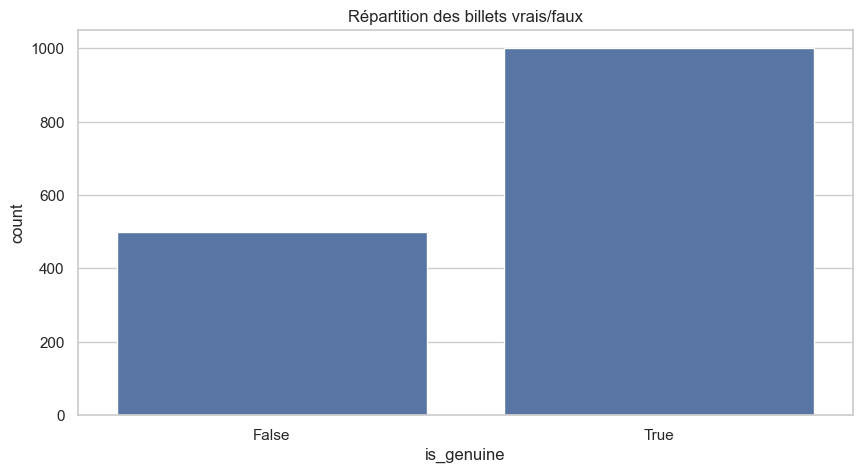

In [52]:
# Distribution vrai/faux
sns.countplot(x='is_genuine', data=df)
plt.title("R√©partition des billets vrais/faux")
plt.show()

In [53]:
# Statistiques globales
display(df.describe())

diagonal  height_left  height_right   margin_low    margin_up  \
count  1500.000000  1500.000000   1500.000000  1463.000000  1500.000000   
mean    171.958440   104.029533    103.920307     4.485967     3.151473   
std       0.305195     0.299462      0.325627     0.663813     0.231813   
min     171.040000   103.140000    102.820000     2.980000     2.270000   
25%     171.750000   103.820000    103.710000     4.015000     2.990000   
50%     171.960000   104.040000    103.920000     4.310000     3.140000   
75%     172.170000   104.230000    104.150000     4.870000     3.310000   
max     173.010000   104.880000    104.950000     6.900000     3.910000   

           length  
count  1500.00000  
mean    112.67850  
std       0.87273  
min     109.49000  
25%     112.03000  
50%     112.96000  
75%     113.34000  
max     114.44000

In [54]:
# V√©rification valeurs manquantes
print(df.isnull().sum())

is_genuine       0
diagonal         0
height_left      0
height_right     0
margin_low      37
margin_up        0
length           0
dtype: int64


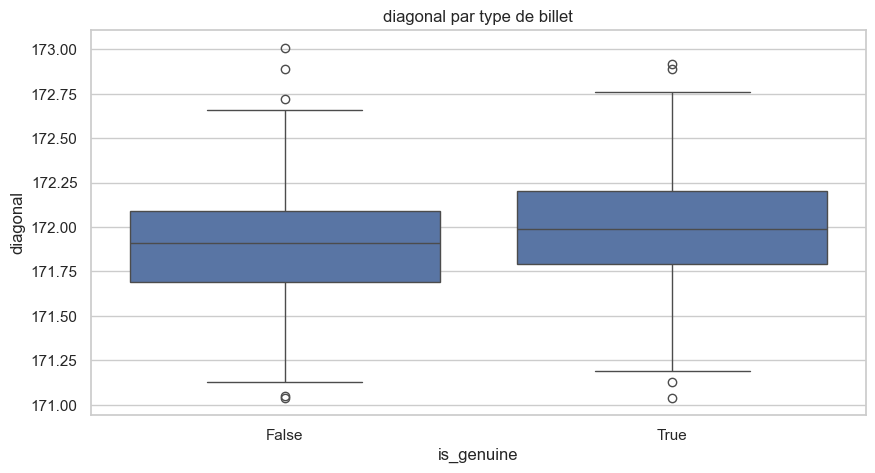

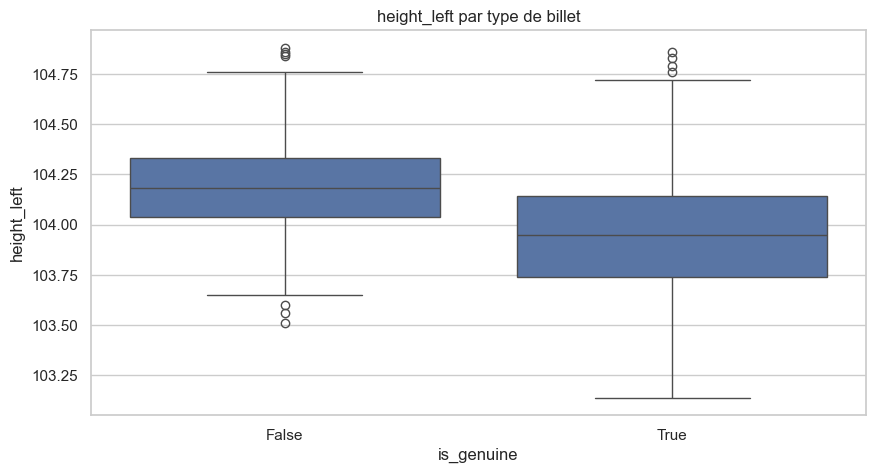

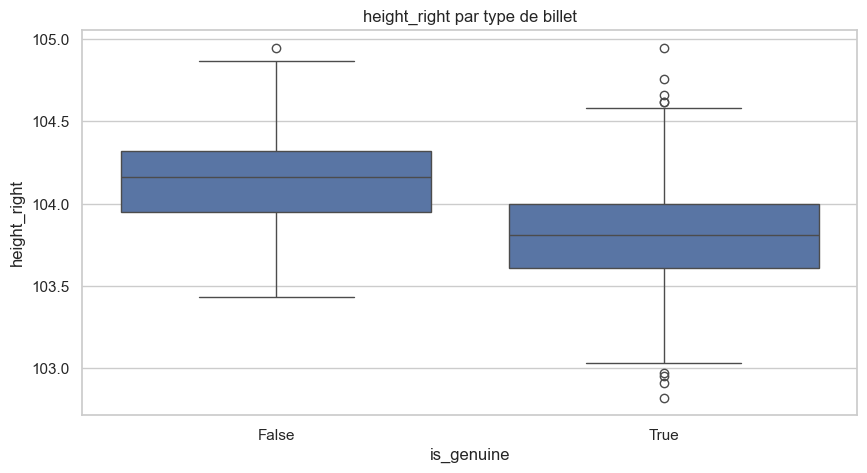

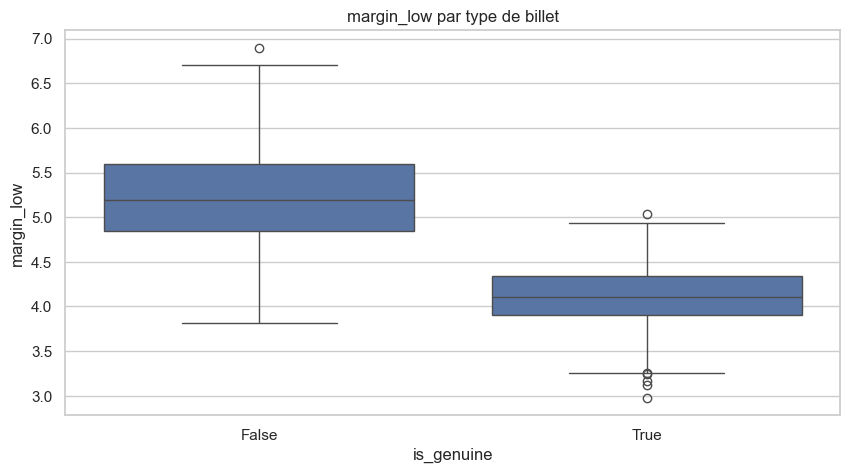

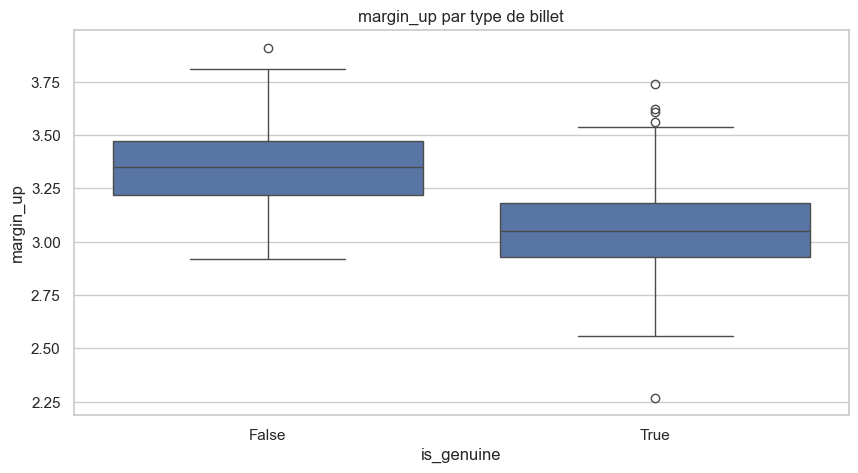

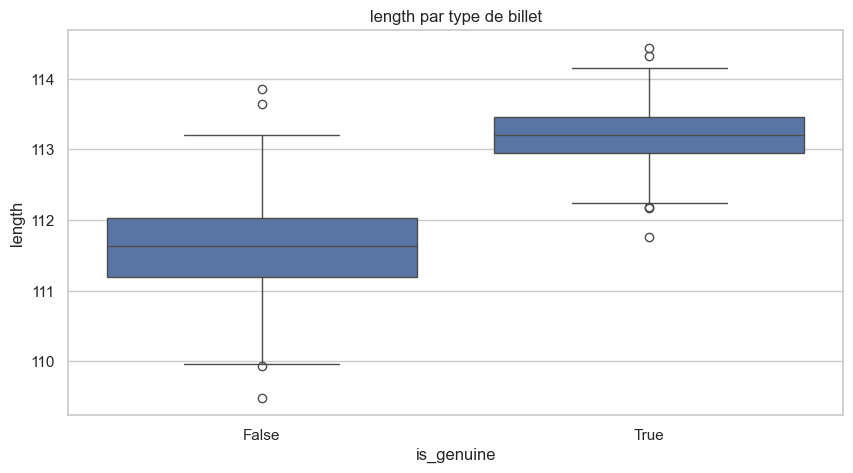

In [55]:
# Boxplots par variable
for col in df.columns[1:]:
    sns.boxplot(x='is_genuine', y=col, data=df)
    plt.title(f"{col} par type de billet")
    plt.show()


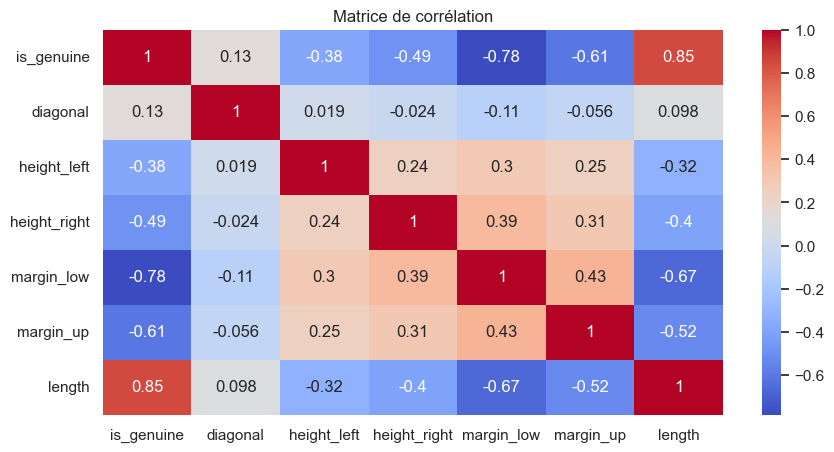

In [56]:

# Corr√©lation entre variables
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.title("Matrice de corr√©lation")
plt.show()

# ===============================
# üßπ 4. Pr√©paration des donn√©es
# ===============================

In [57]:
# Gestion des valeurs manquantes
df["margin_low"] = df["margin_low"].fillna(df["margin_low"].median())


In [58]:

# S√©paration X / y
X = df.drop(columns=["is_genuine"])
y = df["is_genuine"].astype(int)  # Conversion bool -> int


In [59]:

# Standardisation
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


In [60]:

# Split train/test
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.2, random_state=42, stratify=y
)

# ===============================
# üîÅ 5. R√©gression logistique
# ===============================

In [61]:
lr = LogisticRegression()
lr.fit(X_train, y_train)

y_pred_lr = lr.predict(X_test)
print("üîç R√©gression Logistique")
print(confusion_matrix(y_test, y_pred_lr))
print(classification_report(y_test, y_pred_lr))

üîç R√©gression Logistique
[[ 98   2]
 [  1 199]]
              precision    recall  f1-score   support

           0       0.99      0.98      0.98       100
           1       0.99      0.99      0.99       200

    accuracy                           0.99       300
   macro avg       0.99      0.99      0.99       300
weighted avg       0.99      0.99      0.99       300



# ===============================
# üîÄ 6. K-means
# ===============================

In [62]:
kmeans = KMeans(n_clusters=2, random_state=42)
kmeans.fit(X_scaled)

# Attribution des clusters
df["cluster"] = kmeans.labels_

# Comparaison clusters vs v√©rit√© terrain
# On doit mapper les clusters √† is_genuine
cross = pd.crosstab(df["is_genuine"], df["cluster"])
print("Table de correspondance cluster / is_genuine :")
display(cross)


Table de correspondance cluster / is_genuine :


cluster       0    1
is_genuine          
False        13  487
True        990   10

In [63]:

# Choix du mapping : cluster_majoritaire = vrai billet
mapping = {kmeans.labels_[i]: df['is_genuine'].iloc[i] for i in range(10)}
pred_kmeans = [int(mapping[label]) for label in kmeans.labels_]

print("üîç K-means Clustering")
print(confusion_matrix(y, pred_kmeans))
print(classification_report(y, pred_kmeans))

üîç K-means Clustering
[[   0  500]
 [   0 1000]]
              precision    recall  f1-score   support

           0       0.00      0.00      0.00       500
           1       0.67      1.00      0.80      1000

    accuracy                           0.67      1500
   macro avg       0.33      0.50      0.40      1500
weighted avg       0.44      0.67      0.53      1500



/Users/ishemz/myprogramfiles/detection-faux-billet/.venv/lib/python3.13/site-packages/sklearn/metrics/_classification.py:1706: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
/Users/ishemz/myprogramfiles/detection-faux-billet/.venv/lib/python3.13/site-packages/sklearn/metrics/_classification.py:1706: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
/Users/ishemz/myprogramfiles/detection-faux-billet/.venv/lib/python3.13/site-packages/sklearn/metrics/_classification.py:1706: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to

# ===============================
# üìà 7. Comparaison des performances
# ===============================

In [64]:
results = pd.DataFrame({
    "M√©thode": ["R√©gression Logistique", "K-means"],
    "Accuracy": [accuracy_score(y_test, y_pred_lr), accuracy_score(y, pred_kmeans)]
})
display(results)

M√©thode  Accuracy
0  R√©gression Logistique  0.990000
1                K-means  0.666667

# ===============================
# üß™ 8. Utilisation sur donn√©es de production
# ===============================

In [65]:
df_prod = pd.read_csv("../Source/billets.csv", sep=";", encoding="utf-8")

# Nettoyage similaire
df_prod["margin_low"] = df_prod["margin_low"].fillna(df_prod["margin_low"].median())
X_prod = scaler.transform(df_prod)

# Pr√©diction
df_prod["pred_lr"] = lr.predict(X_prod)
df_prod["pred_kmeans"] = kmeans.predict(X_prod)
df_prod["pred_kmeans"] = df_prod["pred_kmeans"].map(mapping)

# Export √©ventuel
# df_prod.to_csv("resultats_predictions.csv", index=False)
display(df_prod.head())

ValueError: The feature names should match those that were passed during fit.
Feature names unseen at fit time:
- is_genuine


In [ ]:
df_prod

is_genuine  diagonal  height_left  height_right  margin_low  margin_up  \
0           True    171.81       104.86        104.95        4.52       2.89   
1           True    171.46       103.36        103.66        3.77       2.99   
2           True    172.69       104.48        103.50        4.40       2.94   
3           True    171.36       103.91        103.94        3.62       3.01   
4           True    171.73       104.28        103.46        4.04       3.48   
...          ...       ...          ...           ...         ...        ...   
1495       False    171.75       104.38        104.17        4.42       3.09   
1496       False    172.19       104.63        104.44        5.27       3.37   
1497       False    171.80       104.01        104.12        5.51       3.36   
1498       False    172.06       104.28        104.06        5.17       3.46   
1499       False    171.47       104.15        103.82        4.63       3.37   

      length  
0     112.83  
1     113.09  
2     113.16  
3     113.51  
4     112.54  
...      ...  
1495  111.28  
1496  110.97  
1497  111.95  
1498  112.25  
1499  112.07  

[1500 rows x 7 columns]